# Cabs Data Analysis
A intensive analysis and research on cab fare and tips data from all across the globe with a special focus on New York City Yellow Cabs <br><br>

# Data Collection and Cleaning


Collecting and cleaning data gathered from the web through various sources.

## Downloaded Dataset



In [2]:
import csv
from pprint import pprint

def extractDateTime(string):
    split= string.split(' ')
    d= split[0].split('-')
    t= split[1].split(':')
    return {'date':(int(d[1]), int(d[2]), int(d[0])), 'time':(int(t[0]), int(t[1]))}

def calculateTimeDiff(a,b):
    return (((b[0]-a[0])*60)+b[1])-a[1]

def data_parser():
    with open('yellow_tripdata_2020-12.csv', encoding='utf8') as inf:
        data= csv.reader(inf)
        lst= [row for row in data]

    lit=[['passengerCount','tripDistance','paymentType','fare','extra','tax','tip','total','date', 'duration']]
    for row in lst[1:]:
        if row[3]!='':
            numpass= int(row[3])
        else:
            numpass= 'NA'
        dist= round(float(row[4]),1)
        if row[9]=='2':
            paytype='Cash'
        elif row[9]=='1':
            paytype='Card'
        else:
            paytype='NA'
        fare= round(float(row[10]),1)
        if fare <=0:
            fare='NA'
        extra= round(float(row[11]),1)
        tax= round(float(row[12]),1)
        tip= round(float(row[13]),1)
        total= round(float(row[16]),1)
        pickDateTime= extractDateTime(row[1])
        dropDateTime= extractDateTime(row[2])
        pickDate= pickDateTime['date']
        pickTime= pickDateTime['time']
        dropDate= dropDateTime['date']
        dropTime= dropDateTime['time']
        date= pickDate
        if(pickDate!=dropDate):
            dropTime= (dropTime[0]+24, dropTime[1])
        duration= calculateTimeDiff(pickTime, dropTime)
        if duration<=0:
            duration='NA'
        if numpass!=0 and numpass!= 'NA' and paytype!='NA' and fare!='NA' and duration!='NA':
            lit.append([numpass, dist, paytype, fare, extra, tax, tip, total, date, duration])

    with open('data1.csv', 'w', newline='') as outf:
        write= csv.writer(outf)
        write.writerows(lit)
    
    return lit[:50]

############ Function Call ############
data_parser()

[['passengerCount',
  'tripDistance',
  'paymentType',
  'fare',
  'extra',
  'tax',
  'tip',
  'total',
  'date',
  'duration'],
 [1, 7.6, 'Card', 21.5, 3.0, 0.5, 2.5, 33.9, (12, 1, 2020), 11],
 [1, 1.6, 'Card', 8.0, 3.0, 0.5, 3.0, 14.8, (12, 1, 2020), 8],
 [1, 16.7, 'Card', 52.0, 0.0, 0.5, 2.5, 63.9, (12, 1, 2020), 27],
 [1, 4.2, 'Card', 14.0, 0.5, 0.5, 1.0, 18.8, (12, 1, 2020), 11],
 [1, 2.2, 'Cash', 8.5, 0.5, 0.5, 0.0, 9.8, (12, 1, 2020), 8],
 [1, 6.4, 'Card', 19.5, 0.5, 0.5, 4.2, 25.0, (12, 1, 2020), 17],
 [1, 1.0, 'Card', 5.5, 0.5, 0.5, 1.9, 11.2, (12, 1, 2020), 5],
 [2, 11.8, 'Card', 36.5, 0.5, 0.5, 1.0, 41.3, (12, 1, 2020), 38],
 [2, 2.7, 'Card', 9.5, 3.0, 0.5, 2.6, 15.9, (12, 1, 2020), 8],
 [1, 6.3, 'Cash', 23.0, 0.5, 0.5, 0.0, 26.8, (12, 1, 2020), 25],
 [1, 18.9, 'Card', 52.0, 0.0, 0.5, 12.3, 73.7, (12, 1, 2020), 30],
 [5, 2.8, 'Cash', 9.5, 0.5, 0.5, 0.0, 13.3, (12, 1, 2020), 7],
 [2, 21.8, 'Card', 52.0, 0.0, 0.5, 11.1, 66.4, (12, 1, 2020), 35],
 [1, 7.6, 'Card', 23.0, 3.0, 0

## Web Collection \#1


In [3]:
import requests
import json
import requests
from bs4 import BeautifulSoup
from pprint import pprint
import numpy as np
import pandas as pd
def web_parser1():
    dataList = []
    resp = requests.get("https://en.wikipedia.org/wiki/List_of_countries_by_vehicles_per_capita")
    soup = BeautifulSoup(resp.text, "html.parser") 
    outer = soup.find("div" , {"id" : "mw-content-text"})
    inner = outer.find("div" , {"class" : "mw-parser-output"})
    table = inner.find("table" , {"class" : "wikitable"})
    rows = table.find_all("tr")
    for row in rows[1:192]:
        dic = {}
        col = row.find_all("td")
        dic["country"] = col[1].text.strip()
        dic["density"] = col[2].text.strip()
        dic["total"] = col[3].text.strip().split("[")[0] if col[3].text != "" else None #Inconist
        try:
            if (int(col[4].text.split("[")[0]) >= 2019):
                dic["year"] = (col[4].text.strip().split("["))[0]
            else:
                dic["year"] = None
        except:
            continue
        dataList.append(dic)
    df = pd.DataFrame(dataList, )
    df = (df.dropna(inplace = False, axis = 0))
    df.to_csv("data3.csv", encoding='utf-8')
    return df
############ Function Call ############
web_parser1()

,country,density,total,year
1,Andorra,"1,207","93,000",2022
3,Iceland,866,"315,294",2020
4,New Zealand,837,"4,221,182",2019
5,United States,816,"267,894,860",2019
6,Finland,790,"4,368,796",2022
7,Liechtenstein,781,"30,249",2019
8,Australia,748,"20,142,942",2021
9,Estonia,735,"978,022",2022
12,Luxembourg,681,"426,346",2019
14,Italy,663,"39,545,232",2019


## Web Collection #2

In [33]:
import requests
import json
import requests
from bs4 import BeautifulSoup
from pprint import pprint
import re
import numpy as np
import pandas as pd

def extractDateTime(inputStr):
    splitList = inputStr.split("T")
    d = splitList[0].split("-")
    t = splitList[1].split(":")
    return {"date" : (int(d[1]), int(d[2]), int(d[0])) , "time" : (int(t[0]), int(t[1]))}
def calculateTimeDiff(a, b):
    return (((b[0] - a[0]) * 60) + b[1]) - a[1]
def web_parser2():
    dataList = []
    r = requests.get("https://data.cityofnewyork.us/resource/2yzn-sicd.json")
    alist = json.loads(r.text)
    months = {}
    for adict in alist[:]:
        dic = {}
        dic["passangerCount"] = int(adict["passenger_count"])
        dic["tripDistance"] = round(float(adict["trip_distance"]), 1)
        if adict["payment_type"] == "2":
            dic["paymentType"] = "Cash"
        elif adict["payment_type"] == "1":
            dic["paymentType"] = "Card"
        else:
            dic["paymentType"] = None
        dic["fair"] = round(float(adict["fare_amount"]), 1)
        if dic["fair"] <= 0:
            dic["fair"] = None
        dic["extra"] = round(float(adict["extra"]), 1)
        dic["tax"] = round(float(adict["mta_tax"]), 1)
        dic["tip"] = round(float(adict["tip_amount"]), 1)
        dic["total"] = round(float(adict["total_amount"]), 1)
        pickUpDateTime = extractDateTime(adict["pickup_datetime"])
        pickUpDate = pickUpDateTime["date"]
        pickUpTime = pickUpDateTime["time"]
        dropOfDateTime = extractDateTime(adict["dropoff_datetime"])
        dropOfDate = dropOfDateTime["date"]
        dropOfTime = dropOfDateTime["time"]
        dic["date"] = pickUpDate
        if(pickUpDate != dropOfDate):
            dropOfTime = (dropOfTime[0] + 24, dropOfTime[1]) 
            dic["time"] = calculateTimeDiff(pickUpTime , dropOfTime)
        else:
            dic["time"] = calculateTimeDiff(pickUpTime , dropOfTime)
        if(dic["time"] <= 0):#INCONSISTENT
            dic["time"] = None
        dataList.append(dic)
    df = pd.DataFrame(dataList)
    df = mod_df = df.dropna(inplace = False, axis = 0)
    df.to_csv("data2.csv", encoding='utf-8')
    return df


############ Function Call ############
web_parser2()


,passangerCount,tripDistance,paymentType,fair,extra,tax,tip,total,date,time
0,1,14.5,Cash,43.0,0.5,0.5,0.0,44.3,"(6, 26, 2015)",34.0
1,5,1.8,Card,8.5,0.0,0.5,1.9,11.2,"(1, 30, 2015)",10.0
2,1,2.1,Card,10.0,0.0,0.5,2.7,13.5,"(6, 23, 2015)",12.0
3,2,2.1,Cash,12.5,0.0,0.5,0.0,13.3,"(6, 3, 2015)",17.0
4,1,0.9,Card,6.5,0.0,0.5,1.4,8.8,"(4, 23, 2015)",6.0
...,...,...,...,...,...,...,...,...,...,...
995,1,3.5,Card,17.0,0.0,0.5,3.6,21.4,"(3, 26, 2015)",23.0
996,1,2.8,Card,12.5,0.0,0.5,4.0,17.3,"(6, 28, 2015)",16.0
997,1,2.8,Cash,16.0,1.0,0.5,0.0,17.8,"(6, 8, 2015)",24.0
998,1,11.5,Cash,36.5,0.0,0.5,0.0,37.3,"(6, 23, 2015)",30.0


In [34]:
import requests
import json
import requests
from bs4 import BeautifulSoup
from pprint import pprint
import re
import numpy as np
import pandas as pd

def extra_source1():
    url = 'https://www.taxi-calculator.com/statistics'
    r = requests.get(url)
    text=r.text
    soup = BeautifulSoup(text, 'html.parser')
    table= soup.find('tbody')
    countries= table.find_all('tr')
    adict={}
    for country in countries:
        countryTag= country.find('th',{'class':'text-left'})
        countryName=re.search(r'[^\t]*',countryTag.text.strip()).group()
        numbers= country.find_all('span')
        baseFee= numbers[3].text
        kmPrice= numbers[8].text
        milePrice= round(float(1.609*float(kmPrice.split(' ')[-1])),2)
        adict[countryName]= [baseFee, '$ ' +str(milePrice)]
    df= pd.DataFrame.from_dict(adict, columns=None)
    df2= pd.DataFrame.transpose(df)
    df2.columns=['Base fee','Mile price']
    df2.to_csv('data4.csv', encoding='utf8')
    return df2

############ Function Call ############
extra_source1()


,Base fee,Mile price
Argentina,$ 1.45,$ 1.27
Australia,$ 2.78,$ 2.48
Austria,$ 4.22,$ 2.45
Belgium,$ 5.41,$ 3.36
Brazil,$ 0.81,$ 0.69
Canada,$ 2.97,$ 2.17
China,$ 1.68,$ 0.42
Croatia,$ 2.71,$ 2.67
Czech Republic,$ 1.79,$ 2.03
Denmark,$ 7.99,$ 2.49


## Data Sources

Include sources (as links) to your datasets. If any of these are different from your sources used in Phase II, please <b>clearly</b> specify.

*   Downloaded Dataset Source:
https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page
*   Web Collection #1 Source:
https://en.wikipedia.org/wiki/List_of_countries_by_vehicles_per_capita
*   Web Collection #2 Source:
https://data.cityofnewyork.us/resource/2yzn-sicd.json



# Data Analysis
For the Data Analysis section, we have utilized the data to complete the following:

*   Create at least 5 insights
*   Generate at least 3 data visualizations
*   Create a SQL Database with relevant data
*   Export aggregated data to at least 1 summary file 

## Insights

        2015   2020
Tip     1.65   1.96
Fares  12.35  10.98


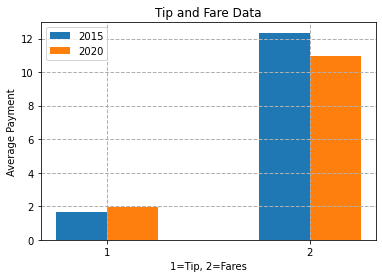

In [32]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np

def insight1():
    df= pd.read_csv('data1.csv', delimiter= ',')
    df2= pd.read_csv('data3.csv', delimiter= ',', index_col=0)
    df3= pd.read_csv('data2.csv', delimiter= ',', index_col=0)
    df4= pd.read_csv('data4.csv', delimiter= ',', index_col=0)

    df=df.rename(columns={'passengerCount':'passengerCount2020', 'tripDistance':'tripDistance2020', 'paymentType':'paymentType2020', 'fare':'fare2020', 'extra':'extra2020', 'tax':'tax2020', 'tip':'tip2020', 'total':'total2020', 'date':'date2020', 'duration':'duration2020'})
    df3=df3.rename(columns={'passangerCount':'passengerCount2015', 'tripDistance':'tripDistance2015', 'paymentType':'paymentType2015', 'fair':'fare2015','extra':'extra2015', 'tax':'tax2015', 'tip':'tip2015', 'total':'total2015', 'date':'date2015', 'time':'duration2015'})

    df5= pd.concat([df, df3], axis=1)
    df5.drop(['paymentType2015','paymentType2020','date2020', 'date2015'], axis=1, inplace=True)
    df6= pd.DataFrame(index= ["Tip", "Fares"], columns=['2015','2020'])
    df6['2015'].iloc[0]= round(df5['tip2015'].mean(),2)
    df6['2020'].iloc[0]= round(df5['tip2020'].mean(),2)
    df6['2015'].iloc[1]= round(df5['fare2015'].mean(),2)
    df6['2020'].iloc[1]= round(df5['fare2020'].mean(),2)
    print(df6)
    
    dl=[1,2]
    d2015= df6['2015'].tolist()
    d2020= df6['2020'].tolist()

    plt.bar([a-0.25 for a in dl], d2015, width= 0.25, label = '2015', align='edge')
    plt.bar([a+0.25 for a in dl], d2020, width= -0.25, label = '2020', align='edge')
    plt.xlabel('1=Tip, 2=Fares')
    plt.ylabel('Average Payment')
    plt.legend(loc='upper left')
    plt.title(' Sales data')

    plt.xticks(dl)
    plt.grid(True, linewidth= 1, linestyle="--")
    plt.title('Tip and Fare Data')
    plt.savefig('v1.png')
    plt.show()


############ Function Call ############
insight1()

### Insight 1 Explanation
The graph compares the trends of average fare and average tip in New York City Yellow Cabs for the same month in 2015 and 2020. So based on our observations from 2015 to 2020, the fares decreased but tips increased. This is actually a positive observation for cab drivers and for the consumers. This benefitted the consumers by decreasing the cab prices and benefitted the drivers as although the fares decreased, their tips increased. However, we feel that overall consumers ended up spending the same amount, but the only difference was now they had a choice. This could be due to multiple reasons. The entry of private cab companies like Uber could have forced yellow cabs to decrease their fare prices. The presence of a pandemic could also have reduced the time people spent commuting decreasing the total fare. All this decreased the fares and increased the tips.

      passengerCount2020  tripDistance2020 paymentType2020  fare2020  \
0                      1               7.6            Card      21.5   
1                      1               1.6            Card       8.0   
2                      1              16.7            Card      52.0   
3                      1               4.2            Card      14.0   
5                      1               6.4            Card      19.5   
...                  ...               ...             ...       ...   
1021                   1               1.6            Card       6.0   
1022                   1               0.6            Card       4.0   
1025                   1               2.1            Card      10.0   
1026                   2               0.7            Card       4.0   
1027                   2               1.0            Card       8.0   

      extra2020  tax2020  tip2020  total2020       date2020  duration2020  
0           3.0      0.5      2.5       33.9  (12, 1, 2020)

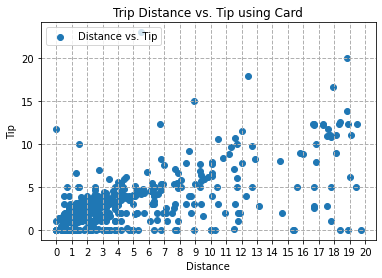

      passengerCount2020  tripDistance2020 paymentType2020  fare2020  \
4                      1               2.2            Cash       8.5   
9                      1               6.3            Cash      23.0   
11                     5               2.8            Cash       9.5   
14                     1               1.7            Cash       7.5   
15                     1               0.5            Cash       4.0   
...                  ...               ...             ...       ...   
1020                   1               1.7            Cash       7.0   
1023                   1               1.3            Cash       6.0   
1024                   2               0.8            Cash       5.0   
1028                   1               1.8            Cash      10.0   
1029                   1               2.0            Cash      10.0   

      extra2020  tax2020  tip2020  total2020       date2020  duration2020  
4           0.5      0.5      0.0        9.8  (12, 1, 2020)

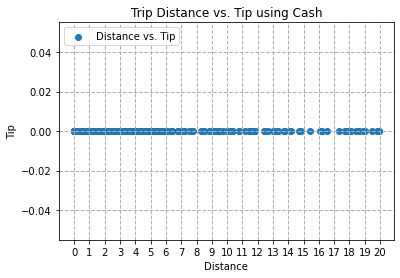

In [15]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np

df= pd.read_csv('data1.csv', delimiter= ',')
df2= pd.read_csv('data3.csv', delimiter= ',', index_col=0)
df3= pd.read_csv('data2.csv', delimiter= ',', index_col=0)
df4= pd.read_csv('data4.csv', delimiter= ',', index_col=0)

df=df.rename(columns={'passengerCount':'passengerCount2020', 'tripDistance':'tripDistance2020', 'paymentType':'paymentType2020', 'fare':'fare2020', 'extra':'extra2020', 'tax':'tax2020', 'tip':'tip2020', 'total':'total2020', 'date':'date2020', 'duration':'duration2020'})
df3=df3.rename(columns={'passangerCount':'passengerCount2015', 'tripDistance':'tripDistance2015', 'paymentType':'paymentType2015', 'fair':'fare2015','extra':'extra2015', 'tax':'tax2015', 'tip':'tip2015', 'total':'total2015', 'date':'date2015', 'time':'duration2015'})

def insight2():
    df7=df[df['tripDistance2020']<=20][0:1000]

    df8= df7[df7['paymentType2020']=='Card']
    print(df8)
    dist= df8['tripDistance2020'].tolist()
    tip= df8['tip2020'].tolist()
    plt.scatter(dist, tip, label = 'Distance vs. Tip')
    plt.xlabel('Distance')
    plt.ylabel('Tip')
    plt.legend(loc='upper left')
    plt.title('Trip Distance vs. Tip using Card')
    plt.xticks([x for x in range(21)])
    plt.grid(True, linewidth= 1, linestyle="--")
    plt.savefig('v20.png')
    plt.show()

    df9= df7[df7['paymentType2020']=='Cash']
    print(df9)
    dist= df9['tripDistance2020'].tolist()
    tip= df9['tip2020'].tolist()
    plt.scatter(dist, tip, label = 'Distance vs. Tip')
    plt.xlabel('Distance')
    plt.ylabel('Tip')
    plt.legend(loc='upper left')
    plt.title('Trip Distance vs. Tip using Cash')
    plt.xticks([x for x in range(21)])
    plt.grid(True, linewidth= 1, linestyle="--")
    plt.savefig('v21.png')
    plt.show()

############ Function Call ############
insight2()

### Insight 2 Explanation

The second visualization shows the dependence of tips based on the method of payment and distance for the trip for yellow cabs. This was very interesting to note that people who paid with cash did not tip at all. This was an unexpected observation that was revealed by the data. We feel that this could be because mostly the people who pay with cash are tourists and it is not a tradition to tip the cab drivers as much as it is in the US. Furthermore, only a small fraction of the people used cash and we don’t think that the data is enough to make general conclusions. Secondly, when we observed the tips paid using a card, we observed an almost linear relationship between the amount of tip and the distance. This was something we expected as people tend to pay more to drivers for longer trips to value their time.

               density        total  year Base fee  Mile price
country                                                       
New Zealand        837    4,221,182  2019   $ 2.21        3.33
United States      816  267,894,860  2019   $ 2.87        2.48
Australia          748   20,142,942  2021   $ 2.78        2.48
Italy              663   39,545,232  2019   $ 4.95        1.90
Japan              590   74,490,676  2019   $ 6.59        3.49
Germany            574   47,715,977  2019   $ 4.31        3.86
Switzerland        537    4,624,000  2019   $ 6.81        6.58
Portugal           530    5,452,119  2019   $ 3.81        0.69
Spain              519   24,558,126  2019   $ 3.41        1.79
Belgium            511    5,889,210  2019   $ 5.41        3.36
Greece             504    5,406,551  2019   $ 1.51        1.38
Netherlands        499    8,677,911  2019   $ 3.58        4.23
France             482   32,416,180  2019   $ 3.76        2.88
South Korea        478   24,703,522  2021   $ 2.66     

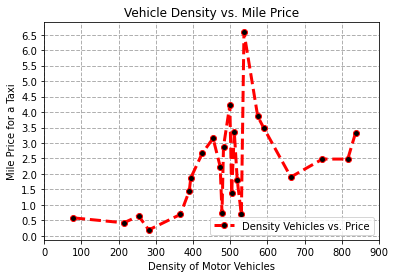

In [18]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np

df= pd.read_csv('data1.csv', delimiter= ',')
df2= pd.read_csv('data3.csv', delimiter= ',', index_col=0)
df3= pd.read_csv('data2.csv', delimiter= ',', index_col=0)

df=df.rename(columns={'passengerCount':'passengerCount2020', 'tripDistance':'tripDistance2020', 'paymentType':'paymentType2020', 'fare':'fare2020', 'extra':'extra2020', 'tax':'tax2020', 'tip':'tip2020', 'total':'total2020', 'date':'date2020', 'duration':'duration2020'})
df3=df3.rename(columns={'passangerCount':'passengerCount2015', 'tripDistance':'tripDistance2015', 'paymentType':'paymentType2015', 'fair':'fare2015','extra':'extra2015', 'tax':'tax2015', 'tip':'tip2015', 'total':'total2015', 'date':'date2015', 'time':'duration2015'})

def insight3():
    df4= pd.read_csv('data4.csv', delimiter= ',', index_col=0)
    df4=df4.rename({'United States of America':'United States'}, axis='index')
    df10= df2.set_index('country').join(df4)
    df10.dropna(axis=0, inplace=True)
    df10['Mile price']=df10['Mile price'].str[1:].astype(float)
    df10['density']= df10['density'].astype(int)
    print(df10)
    density = df10['density'].tolist()
    mile  = df10['Mile price'].tolist()

    plt.plot(density, mile, label = 'Density Vehicles vs. Price', 
          color='r', marker='o', markerfacecolor='k', 
          linestyle='--', linewidth=3)

    plt.xlabel('Density of Motor Vehicles')
    plt.ylabel('Mile Price for a Taxi')
    plt.legend(loc='lower right')
    plt.title('Vehicle Density vs. Mile Price')
    plt.xticks([i for i in range(0,1000,100)])
    plt.yticks([i for i in np.arange(0,7,0.5)])
    plt.grid(True, linewidth= 1, linestyle="--")
    plt.savefig('v3.png')
    plt.show()





############ Function Call ############
insight3()

### Insight 3 Explanation
This graph shows us the dependence of price per mile for a cab in different countries based on the density of vehicles per thousand people in their country. We saw a general trend that as the density of vehicles increased, so did the price. The reason for this could probably be that as more people bought private vehicles, the need to use the cab decreased, and using cabs became a luxury, therefore increasing the price. Further, there is a peak when the number of motor vehicles is little over half the number of people. This could probably be because that creates a perfect sweet spot for countries with people rich enough to afford cars but also, the number of cars is less enough to increase demand. So this leads to an increase in demand for a high-paying market increasing the price.

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np


df= pd.read_csv('data1.csv', delimiter= ',')
df2= pd.read_csv('data3.csv', delimiter= ',', index_col=0)
df3= pd.read_csv('data2.csv', delimiter= ',', index_col=0)
df4= pd.read_csv('data4.csv', delimiter= ',', index_col=0)

df=df.rename(columns={'passengerCount':'passengerCount2020', 'tripDistance':'tripDistance2020', 'paymentType':'paymentType2020', 'fare':'fare2020', 'extra':'extra2020', 'tax':'tax2020', 'tip':'tip2020', 'total':'total2020', 'date':'date2020', 'duration':'duration2020'})
df3=df3.rename(columns={'passangerCount':'passengerCount2015', 'tripDistance':'tripDistance2015', 'paymentType':'paymentType2015', 'fair':'fare2015','extra':'extra2015', 'tax':'tax2015', 'tip':'tip2015', 'total':'total2015', 'date':'date2015', 'time':'duration2015'})

def insight4():
    df11= pd.DataFrame(index=[2015,2020], columns=['Card to Cash Ratio'])
    f=len(df3[df3['paymentType2015']=='Cash'].index)
    g=len(df3[df3['paymentType2015']=='Card'].index)
    j=len(df[df['paymentType2020']=='Cash'].index)
    k=len(df[df['paymentType2020']=='Card'].index)
    df11.loc[2015,:]= round(g/f,2)
    df11.loc[2020,:]= round(k/j,2)
    print(df11)


############ Function Call ############
insight4()

     Card to Cash Ratio
2015                1.8
2020               2.81


### Insight 4 Explanation

From this data, it can be seen that from 2015 to 2020, the ratio of passengers that used cards increased. This could be since technological advancements have made it more necessary to carry around a card than cash. Also, as 2020 was during the pandemic, to have less contact with others, people might have opted to use a card instead. Along with the insight that people who pay with card tip more than those that pay with cash, this might suggest that taxi drivers received more tips in 2020.

In [20]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np


df= pd.read_csv('data1.csv', delimiter= ',')
df2= pd.read_csv('data3.csv', delimiter= ',', index_col=0)
df3= pd.read_csv('data2.csv', delimiter= ',', index_col=0)
df4= pd.read_csv('data4.csv', delimiter= ',', index_col=0)

df=df.rename(columns={'passengerCount':'passengerCount2020', 'tripDistance':'tripDistance2020', 'paymentType':'paymentType2020', 'fare':'fare2020', 'extra':'extra2020', 'tax':'tax2020', 'tip':'tip2020', 'total':'total2020', 'date':'date2020', 'duration':'duration2020'})
df3=df3.rename(columns={'passangerCount':'passengerCount2015', 'tripDistance':'tripDistance2015', 'paymentType':'paymentType2015', 'fair':'fare2015','extra':'extra2015', 'tax':'tax2015', 'tip':'tip2015', 'total':'total2015', 'date':'date2015', 'time':'duration2015'})

def insight5():
    df12= df.groupby('passengerCount2020').agg({'tripDistance2020':'mean','fare2020':'mean','total2020':'count','tip2020':'mean'})
    df13= df12[df12['total2020']>5]
    df14= df3.groupby('passengerCount2015').agg({'tripDistance2015':'mean','fare2015':'mean','total2015':'count','tip2015':'mean'})
    df15= df14[df14['total2015']>5]
    print(df13.round(decimals= 2))
    print('\n')
    print(df15.round(decimals= 2))





############ Function Call ############
insight5()

                    tripDistance2020  fare2020  total2020  tip2020
passengerCount2020                                                
1                               2.43     10.92    1009616     1.96
2                               2.58     11.27     175945     1.99
3                               2.54     11.13      46975     1.95
4                               2.64     11.56      18105     1.99
5                               2.53     10.99      33533     1.98
6                               2.45     10.72      26865     1.95


                    tripDistance2015  fare2015  total2015  tip2015
passengerCount2015                                                
1                               2.57     11.64        700     1.66
2                               3.56     14.46        151     1.53
3                               3.30     14.59         38     1.86
4                               3.54     14.84         16     1.47
5                               3.28     13.65         51   

### Insight 5 Explanation

Contrary to intuition, the passenger count doesn't seem to affect the average amount of tips paid within the group. In 2020, the changes between average tips among the different passenger count groups is extremely consistent. There was more variation in 2015, but still is around the same number: between 1.47 and 1.91. Usually in service industries, more people means higher tips due to inconveniences, however, it does not seem that people tip more in larger groups when riding taxis.

## Data Visualizations

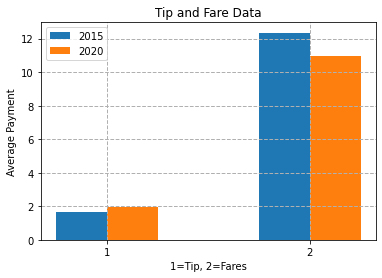

In [22]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np

df= pd.read_csv('data1.csv', delimiter= ',')
df2= pd.read_csv('data3.csv', delimiter= ',', index_col=0)
df3= pd.read_csv('data2.csv', delimiter= ',', index_col=0)
df4= pd.read_csv('data4.csv', delimiter= ',', index_col=0)

df=df.rename(columns={'passengerCount':'passengerCount2020', 'tripDistance':'tripDistance2020', 'paymentType':'paymentType2020', 'fare':'fare2020', 'extra':'extra2020', 'tax':'tax2020', 'tip':'tip2020', 'total':'total2020', 'date':'date2020', 'duration':'duration2020'})
df3=df3.rename(columns={'passangerCount':'passengerCount2015', 'tripDistance':'tripDistance2015', 'paymentType':'paymentType2015', 'fair':'fare2015','extra':'extra2015', 'tax':'tax2015', 'tip':'tip2015', 'total':'total2015', 'date':'date2015', 'time':'duration2015'})

def visual1():
    df= pd.read_csv('data1.csv', delimiter= ',')
    df2= pd.read_csv('data3.csv', delimiter= ',', index_col=0)
    df3= pd.read_csv('data2.csv', delimiter= ',', index_col=0)
    df4= pd.read_csv('data4.csv', delimiter= ',', index_col=0)

    df=df.rename(columns={'passengerCount':'passengerCount2020', 'tripDistance':'tripDistance2020', 'paymentType':'paymentType2020', 'fare':'fare2020', 'extra':'extra2020', 'tax':'tax2020', 'tip':'tip2020', 'total':'total2020', 'date':'date2020', 'duration':'duration2020'})
    df3=df3.rename(columns={'passangerCount':'passengerCount2015', 'tripDistance':'tripDistance2015', 'paymentType':'paymentType2015', 'fair':'fare2015','extra':'extra2015', 'tax':'tax2015', 'tip':'tip2015', 'total':'total2015', 'date':'date2015', 'time':'duration2015'})

    df5= pd.concat([df, df3], axis=1)
    df5.drop(['paymentType2015','paymentType2020','date2020', 'date2015'], axis=1, inplace=True)
    df6= pd.DataFrame(index= ["Tip", "Fares"], columns=['2015','2020'])
    df6['2015'].iloc[0]= df5['tip2015'].mean()
    df6['2020'].iloc[0]= df5['tip2020'].mean()
    df6['2015'].iloc[1]= df5['fare2015'].mean()
    df6['2020'].iloc[1]= df5['fare2020'].mean()
    
    dl=[1,2]
    d2015= df6['2015'].tolist()
    d2020= df6['2020'].tolist()

    plt.bar([a-0.25 for a in dl], d2015, width= 0.25, label = '2015', align='edge')
    plt.bar([a+0.25 for a in dl], d2020, width= -0.25, label = '2020', align='edge')
    plt.xlabel('1=Tip, 2=Fares')
    plt.ylabel('Average Payment')
    plt.legend(loc='upper left')
    plt.title(' Sales data')

    plt.xticks(dl)
    plt.grid(True, linewidth= 1, linestyle="--")
    plt.savefig('v1.png')
    plt.title('Tip and Fare Data')
    
    plt.show()



############ Function Call ############
visual1()

### Visualization 1 Explanation

This is the visual used to support insight 1. The graph compares the trends of average fare and average tip in New York City Yellow Cabs for the same month in 2015 and 2020. So based on our observations from 2015 to 2020, the average fares decreased but average tips increased.

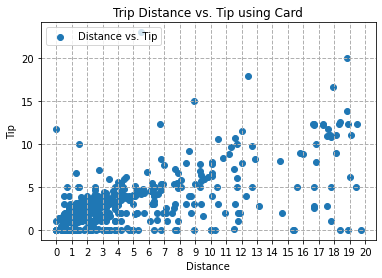

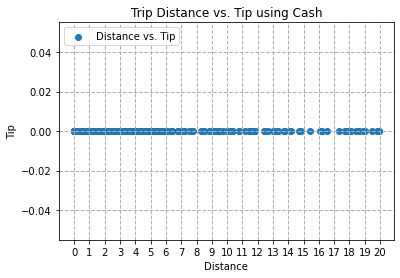

In [24]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np

df= pd.read_csv('data1.csv', delimiter= ',')
df2= pd.read_csv('data3.csv', delimiter= ',', index_col=0)
df3= pd.read_csv('data2.csv', delimiter= ',', index_col=0)
df4= pd.read_csv('data4.csv', delimiter= ',', index_col=0)

df=df.rename(columns={'passengerCount':'passengerCount2020', 'tripDistance':'tripDistance2020', 'paymentType':'paymentType2020', 'fare':'fare2020', 'extra':'extra2020', 'tax':'tax2020', 'tip':'tip2020', 'total':'total2020', 'date':'date2020', 'duration':'duration2020'})
df3=df3.rename(columns={'passangerCount':'passengerCount2015', 'tripDistance':'tripDistance2015', 'paymentType':'paymentType2015', 'fair':'fare2015','extra':'extra2015', 'tax':'tax2015', 'tip':'tip2015', 'total':'total2015', 'date':'date2015', 'time':'duration2015'})

def visual2():
    df7=df[df['tripDistance2020']<=20][0:1000]

    df8= df7[df7['paymentType2020']=='Card']
    dist= df8['tripDistance2020'].tolist()
    tip= df8['tip2020'].tolist()
    plt.scatter(dist, tip, label = 'Distance vs. Tip')
    plt.xlabel('Distance')
    plt.ylabel('Tip')
    plt.legend(loc='upper left')
    plt.title('Trip Distance vs. Tip using Card')
    plt.xticks([x for x in range(21)])
    plt.grid(True, linewidth= 1, linestyle="--")
    plt.savefig('v20.png')
    plt.show()

    df9= df7[df7['paymentType2020']=='Cash']
    dist= df9['tripDistance2020'].tolist()
    tip= df9['tip2020'].tolist()
    plt.scatter(dist, tip, label = 'Distance vs. Tip')
    plt.xlabel('Distance')
    plt.ylabel('Tip')
    plt.legend(loc='upper left')
    plt.title('Trip Distance vs. Tip using Cash')
    plt.xticks([x for x in range(21)])
    plt.grid(True, linewidth= 1, linestyle="--")
    plt.savefig('v21.png')
    plt.show()




############ Function Call ############
visual2()

### Visualization 2 Explanation

This is the visual used to support insight 2. The second visualization shows the dependence of tips based on the method of payment and distance for the trip for yellow cabs. This was very interesting to note that people who paid with cash did not tip at all.

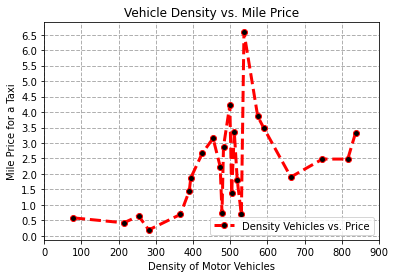

In [26]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np

df= pd.read_csv('data1.csv', delimiter= ',')
df2= pd.read_csv('data3.csv', delimiter= ',', index_col=0)
df3= pd.read_csv('data2.csv', delimiter= ',', index_col=0)

df=df.rename(columns={'passengerCount':'passengerCount2020', 'tripDistance':'tripDistance2020', 'paymentType':'paymentType2020', 'fare':'fare2020', 'extra':'extra2020', 'tax':'tax2020', 'tip':'tip2020', 'total':'total2020', 'date':'date2020', 'duration':'duration2020'})
df3=df3.rename(columns={'passangerCount':'passengerCount2015', 'tripDistance':'tripDistance2015', 'paymentType':'paymentType2015', 'fair':'fare2015','extra':'extra2015', 'tax':'tax2015', 'tip':'tip2015', 'total':'total2015', 'date':'date2015', 'time':'duration2015'})

def visual3():
    df4= pd.read_csv('data4.csv', delimiter= ',', index_col=0)
    df4=df4.rename({'United States of America':'United States'}, axis='index')
    df10= df2.set_index('country').join(df4)
    df10.dropna(axis=0, inplace=True)
    df10['Mile price']=df10['Mile price'].str[1:].astype(float)
    df10['density']= df10['density'].astype(int)
    density = df10['density'].tolist()
    mile  = df10['Mile price'].tolist()

    plt.plot(density, mile, label = 'Density Vehicles vs. Price', 
          color='r', marker='o', markerfacecolor='k', 
          linestyle='--', linewidth=3)

    plt.xlabel('Density of Motor Vehicles')
    plt.ylabel('Mile Price for a Taxi')
    plt.legend(loc='lower right')
    plt.title('Vehicle Density vs. Mile Price')
    plt.xticks([i for i in range(0,1000,100)])
    plt.yticks([i for i in np.arange(0,7,0.5)])
    plt.grid(True, linewidth= 1, linestyle="--")
    plt.savefig('v3.png')
    plt.show()





############ Function Call ############
visual3()

### Visualization 3 Explanation

This is the visual used to support insight 3. This graph shows us the dependence of price per mile for a cab in different countries based on the density of vehicles per thousand people in their country. We saw a general trend that as the density of vehicles increased, so did the price.

## Database Creation

In [ ]:
import pymysql
from pprint import pprint
import getpass
import pandas as pd

def create_cursor(host_name, user_name, pw, db_name):
    try:
        connection = pymysql.connect(host = host_name, user = user_name, password = pw, db = db_name, \
                                    charset = "utf8mb4", cursorclass = pymysql.cursors.Cursor)
        cursor = connection.cursor()
        return cursor
    except Exception as e:
        print(e)
        print(f"Couldn't log in to MySQL server using this password: {pw}.\n")


def dataBaseCreation(cursor):
    df1 = pd.read_csv('data2.csv', delimiter=',', index_col=0)
    df2 = pd.read_csv('data4.csv', delimiter=',', index_col=0)
    cursor.execute('Drop database if exists cabs')
    cursor.execute('Create database cabs')
    cursor.execute('Use cabs')
    cursor.execute('create table trips (country_name varchar(60), trip_distance float, total float)')
    cursor.execute('create table countries (country_name varchar(60), base_fee float,mile_price float)')
    for i in range(0,len(df1)):
        cursor.execute('insert into trips values ("USA", {trip_distance} , {total});'.format(trip_distance=df1.iloc[i, 1] , total = df1.iloc[i, 7]))
    for row in df2.iterrows():
        if row[0] == "United States of America":
            cursor.execute('insert into countries values ("USA", {base_fee} , {mile_price});'.format(
                base_fee=float(df2.loc[row[0]][0].strip("$").strip()),
                mile_price=float(df2.loc[row[0]][1].strip("$").strip())))
        else:
            cursor.execute('insert into countries values ("NA", {base_fee} , {mile_price});'.format(
                base_fee=float(df2.loc[row[0]][0].strip("$").strip()),
                mile_price=float(df2.loc[row[0]][1].strip("$").strip())))
    #cursor.execute('SELECT * FROM countries')
    result = cursor.fetchall()
    return result

def main():
    user_password = getpass.getpass('\n# Enter your MySQL Server password: ')
    cursor = create_cursor('localhost', 'root', user_password, 'cabs')
    pprint(dataBaseCreation(cursor))

############ Function Call ############
main()


## Summary Files

In [28]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np

df= pd.read_csv('data1.csv', delimiter= ',')
df2= pd.read_csv('data3.csv', delimiter= ',', index_col=0)
df3= pd.read_csv('data2.csv', delimiter= ',', index_col=0)
df4= pd.read_csv('data4.csv', delimiter= ',', index_col=0)

df=df.rename(columns={'passengerCount':'passengerCount2020', 'tripDistance':'tripDistance2020', 'paymentType':'paymentType2020', 'fare':'fare2020', 'extra':'extra2020', 'tax':'tax2020', 'tip':'tip2020', 'total':'total2020', 'date':'date2020', 'duration':'duration2020'})
df3=df3.rename(columns={'passangerCount':'passengerCount2015', 'tripDistance':'tripDistance2015', 'paymentType':'paymentType2015', 'fair':'fare2015','extra':'extra2015', 'tax':'tax2015', 'tip':'tip2015', 'total':'total2015', 'date':'date2015', 'time':'duration2015'})
def summary1():
    df16= df.groupby(['passengerCount2020','paymentType2020']).agg({'total2020':'count','tip2020':'mean'})
    df17= df3.groupby(['passengerCount2015', 'paymentType2015']).agg({'total2015':'count','tip2015':'mean'})
    print(df16.round(decimals=2))
    print('\n')
    print(df17.round(decimals=2))
    df16.to_excel("summary1.xlsx", sheet_name='2015', encoding='utf-8')
    df17.to_excel("summary2.xlsx", sheet_name='2020', encoding='utf-8')





############ Function Call ############
summary1()

                                    total2020  tip2020
passengerCount2020 paymentType2020                    
1                  Card                746749     2.65
                   Cash                262867     0.00
2                  Card                128955     2.71
                   Cash                 46990     0.00
3                  Card                 34415     2.66
                   Cash                 12560     0.00
4                  Card                 13090     2.76
                   Cash                  5015     0.00
5                  Card                 24424     2.72
                   Cash                  9109     0.00
6                  Card                 19495     2.68
                   Cash                  7370     0.00
7                  Card                     1    17.90
8                  Card                     2     1.20
                   Cash                     1     0.00
9                  Card                     1     1.90


        